# pandasを使ったオープンデータ解析（１１月５日）
![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/300px-Pandas_logo.svg.png)

下のアイコンをクリック。

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ymatumot/GSC/blob/master/pandas.ipynb)

**pandas**（ https://pandas.pydata.org/ ）は、大規模データ構造を保持して、アクセスして、統計処理することを高速に実現するためのライブラリである。pandasはスプレッドシートやデータベースのようなオブジェクト型とデータを操作するための様々なメソッドを提供する。また、CSV, Exel, SQL, JSON, HDF5など、様々なフォーマットのデータを取り込んだり、様々なフォーマットのファイルに出力することが可能である。

pandasには**Series**と**DataFrame**の２つの種類のオブジェクト型が用意されている。それぞれの特徴は以下のようにまとめられる。

    Series: 1次元に均等に並んだ配列データ
    DataFrame: 様々な構造を持つ2次元配列データ

Seriesは１次元のデータで、各要素に対して0から始まるインデックスで管理される。DataFrameは各列がSeriesで構成された2次元配列のデータ構造を持つ（下図、pandasオフィシャルサイトより）。

![DataFrame](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

各列は辞書と同じくキーで管理される。本講義では、スプレッドシートやデータベースなどと同様の扱いが可能なDataFrameに絞って説明する。

DataFrameに対しては、以下のような代表的な処理が可能である。

* 統計処理（平均値、分散）
* 並べ替え
* 条件指定による選択
* データサイズの可変性（列の挿入、削除）
* データ欠損に対する処理（除去、補間）

また、pandasはNumPyをベースに作られているので、DataFrameやSeriesオブジェクトにはnumpy.ndarrayと同じメソッドやデータ属性を参照することができる（`ndarray.shape`, `ndarray.dtypes`）。

## まずは始めよう
1990年の国勢調査に基づくカリフォルニア州の各地区の住宅価格などの情報をまとめたデータが、Google Colabの`./sample_data`以下にCSV形式のファイルとして予め用意されている。このデータはしばしば機械学習のチュートリアルデータとして使われる。ここでは、pandasが提供する様々な機能の一部を紹介するためのサンプルデータとして使用する。

In [1]:
# A kind of magical phrase
import pandas as pd

In [2]:
# Reading a csv sample data of California housing prices
dir = './sample_data/' 
df = pd.read_csv(dir+'california_housing_train.csv')
print('Type of df:',type(df))
print()
df.info()

Type of df: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


`df`がDataFrame型のオブジェクトである。`df.info()`によって、読み込んだデータのサマリーが表示される。9つのラベル（列）があり、それぞれ17,000個のエントリー（インデックスが0~16999）が倍精度で記録されている。このデータの場合は、順に「地域の経度」「地域の緯度」「住宅年齢の中央値」「全部屋数」「全寝室数」「人口」「世帯数」「世帯収入の中央値（万USドル）」「住宅価格の中央値（USドル）」のように各列がラベル付けされている。

`head()`メソッドによって実際の中身を表示させよう。

In [3]:
# The first 5 rows
df.head() #Or df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


行はインデックス0~4でラベル付され、各列は先頭のキーによってラベル付されている。最後の方の行を表示させるには`tail()`メソッドを使用する。

In [4]:
# The last 7 rows
df.tail(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0
16994,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


ある特定のラベル（列）だけを抜き出したい場合は、辞書と同じようにしてラベルをキーにして参照する。

In [5]:
df['population'].head(10)

0    1015.0
1    1129.0
2     333.0
3     515.0
4     624.0
5     671.0
6    1841.0
7     375.0
8    3134.0
9     787.0
Name: population, dtype: float64

スライスを使っても指定することができる。

In [6]:
df[['total_rooms','population']][5:16:5]

,total_rooms,population
5,1387.0,671.0
10,3741.0,2434.0
15,2556.0,1005.0


DataFrameの内容をCSVファイルに保存する。前述のように、pandasは様々なファイルフォーマットに対応している。その他のフォーマットに対する取り扱いは https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html を参照のこと。

## 統計処理
ラベルそれぞれに対して、統計量を計算して出力する。

* データ数: `count()`
* 平均: `mean()`
* 分散、標準偏差: `var()`、 `std()`

In [9]:
df.count() #number of data in each column

longitude             17000
latitude              17000
housing_median_age    17000
total_rooms           17000
total_bedrooms        17000
population            17000
households            17000
median_income         17000
median_house_value    17000
dtype: int64

In [10]:
df.mean() # mean of each column

longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64

In [11]:
df.var() #variance of each column

longitude             4.020692e+00
latitude              4.568221e+00
housing_median_age    1.584310e+02
total_rooms           4.752169e+06
total_bedrooms        1.776618e+05
population            1.317566e+06
households            1.478563e+05
median_income         3.641061e+00
median_house_value    1.345223e+10
dtype: float64

In [12]:
df.std() #standard deviation of each column

longitude                  2.005166
latitude                   2.137340
housing_median_age        12.586937
total_rooms             2179.947071
total_bedrooms           421.499452
population              1147.852959
households               384.520841
median_income              1.908157
median_house_value    115983.764387
dtype: float64

全ラベルそれぞれに対する詳細な統計情報は`describe()`メソッドで一度に表示させることができる。

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


のようにして指定する。

各ラベル同士の相関係数を`corr()`メソッドで一度に表示させることができる。

In [14]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


これらの結果は変数（SeriesまたはDataFrame）として保持し、後に参照することができる。

In [15]:
df_corr = df.corr()
print('contents of df_corr')
print(df_corr['longitude'])
print()
print('shape of df_corr')
print(df_corr.shape)

contents of df_corr
longitude             1.000000
latitude             -0.925208
housing_median_age   -0.114250
total_rooms           0.047010
total_bedrooms        0.071802
population            0.101674
households            0.059628
median_income        -0.015485
median_house_value   -0.044982
Name: longitude, dtype: float64

shape of df_corr
(9, 9)


## 並べ替え（ソート）
ラベルを指定して、ラベルの値順（昇順）にソートして並べ替えることができる。

```python
df.sort_values(by='label',ascending=True) #ascending=False for sorting by descending order
```



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [17]:
df.sort_values(by='population')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8232,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.5360,350000.0
2990,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0
2907,-117.76,35.22,4.0,18.0,3.0,8.0,6.0,1.6250,275000.0
14105,-122.06,37.39,26.0,18.0,4.0,8.0,4.0,3.7500,375000.0
288,-116.76,34.14,4.0,42.0,10.0,9.0,3.0,0.5360,42500.0
...,...,...,...,...,...,...,...,...,...
3296,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0
2969,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0


上記ではラベル"population"順にソートして表示している。データの中身自体を書き換えているわけではないので、indexも同様に入れ替わっている。

## 条件文によるデータの抜き出し
`np.where()`メソッドのように、条件に当てはまるデータのみを抜き出すことができる。例えば、人口が平均値より大きいデータのみを抜き出すことを考えよう。

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [19]:
pop_mean = df['population'].mean()
df_conditioned = df[df['population']>pop_mean]
print('The average population:',pop_mean)
print()
df_conditioned

The average population: 1429.5739411764705



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
10,-114.60,33.62,16.0,3741.0,801.0,2434.0,824.0,2.6797,86500.0
24,-115.22,33.54,18.0,1706.0,397.0,3424.0,283.0,1.6250,53500.0
38,-115.48,32.68,15.0,3414.0,666.0,2097.0,622.0,2.3319,91200.0
...,...,...,...,...,...,...,...,...,...
16983,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0
16986,-124.19,40.73,21.0,5694.0,1056.0,2907.0,972.0,3.5363,90100.0
16987,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0
16988,-124.21,41.75,20.0,3810.0,787.0,1993.0,721.0,2.0074,66900.0


論理和`|`、論理積`&`、否定`~`で条件文をつなげて、より複雑な条件式を使うこともできる。例えば、人口が平均値より大きい**かつ**住宅年齢の中央値が全データの平均値より小さい場合のデータを抜き出すことを考えよう。以下のように、条件文に対する真偽値が格納されたmaskを使って抜き出すことも可能である。複数の条件文をつなげるには各条件文を"()"で囲む。

In [20]:
pop_mean = df['population'].mean()
age_mean = df['housing_median_age'].mean()
mask = (df['population'] > pop_mean) & (df['housing_median_age'] < age_mean)
df_conditioned = df[mask]

print('The average population:',pop_mean)
print('The average age:',age_mean)
print()
df_conditioned

The average population: 1429.5739411764705
The average age: 28.58935294117647



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
10,-114.60,33.62,16.0,3741.0,801.0,2434.0,824.0,2.6797,86500.0
24,-115.22,33.54,18.0,1706.0,397.0,3424.0,283.0,1.6250,53500.0
38,-115.48,32.68,15.0,3414.0,666.0,2097.0,622.0,2.3319,91200.0
40,-115.49,32.69,17.0,1960.0,389.0,1691.0,356.0,1.8990,64000.0
...,...,...,...,...,...,...,...,...,...
16983,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0
16986,-124.19,40.73,21.0,5694.0,1056.0,2907.0,972.0,3.5363,90100.0
16987,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0
16988,-124.21,41.75,20.0,3810.0,787.0,1993.0,721.0,2.0074,66900.0


## 行、列の削除・追加
DataFrameの列を削除したり追加したりすることができる。削除をする場合は`drop()`メソッドを利用する。`drop()`または`drop(axis=0)`で行を削除、`drop(axis=1)`で列を削除する。

In [21]:
house_holds = df['households'] # save to a Serial 
df_dropped = df.drop('households',axis=1)
df_dropped.info() #check if label "households" exists

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   median_income       17000 non-null  float64
 7   median_house_value  17000 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


新たに追加するには、ラベルとデータを渡せば良い。

In [22]:
df_dropped['households'] = house_holds
df_dropped.info() #check if label "households" recovered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   median_income       17000 non-null  float64
 7   median_house_value  17000 non-null  float64
 8   households          17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## 欠損値を含むデータに対する処理
データは常にクリーンな状態にあるわけではなく、一部に欠損値が含まれる場合がある。欠損値を含む行または列データに対しては、データの削除又は周りのデータを用いた補間によって対処することがpandasでは可能である。

### 欠損データの削除
欠損データとして、`None`が`NaN`（Not a Number）として含まれる場合がある。いま使用しているデータに`None`が含まれているかどうかを調べるためには、`isna()`メソッドを使う。また、各ラベル（列）に欠損値が含まれるかどうかは、`isna()`に`any()`メソッドを適用して行う。また、`sum()`は欠損値の下図を各ラベル（列）に対して数える。

In [38]:
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
16995,False,False,False,False,False,False,False,False,False
16996,False,False,False,False,False,False,False,False,False
16997,False,False,False,False,False,False,False,False,False
16998,False,False,False,False,False,False,False,False,False


In [24]:
df.isna().any() #for each column (label)

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [25]:
df.isna().any(axis=1) #for each row (index)

0        False
1        False
2        False
3        False
4        False
         ...  
16995    False
16996    False
16997    False
16998    False
16999    False
Length: 17000, dtype: bool

In [26]:
df.isna().sum() #counts numbers of NaN data

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

いま使用しているサンプルデータは以上より欠損値がないことがわかる。そこで、擬似的に欠損値を入れてみることにしよう。以下では、ラベル'total_rooms'の最初の100レコードに欠損値をランダムに30個代入する。

In [27]:
import numpy as np
count = df['total_rooms'].count()

mask = np.random.choice(100,30,replace=False) # randomply samples 30 elements without replacement
df['total_rooms'][mask] = None
df.isna().any() #Now label 'total_rooms' contains NaN

longitude             False
latitude              False
housing_median_age    False
total_rooms            True
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [28]:
df.isna().sum() #confirm 30 elements

longitude              0
latitude               0
housing_median_age     0
total_rooms           30
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
dtype: int64

30レコードに`NaN`が存在することが確認できる。そこで、`NaN`を含むレコードを削除することにしよう。すなわち、`NaN`を含むインデックス（行）を削除する。そのためには、`dropna()`メソッドを使う。

In [29]:
df_dropped = df.dropna()
df_dropped.isna().any() # now records with NaN are dropped

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [30]:
df_dropped.info() #totally 16970 records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16970 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16970 non-null  float64
 1   latitude            16970 non-null  float64
 2   housing_median_age  16970 non-null  float64
 3   total_rooms         16970 non-null  float64
 4   total_bedrooms      16970 non-null  float64
 5   population          16970 non-null  float64
 6   households          16970 non-null  float64
 7   median_income       16970 non-null  float64
 8   median_house_value  16970 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


### 欠損値の補間
値を代入する前は、

<AxesSubplot:>

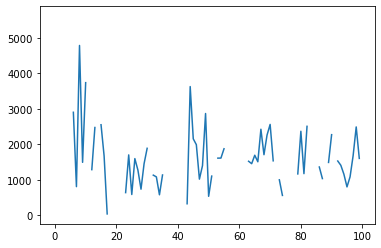

In [31]:
df['total_rooms'][0:100].plot() # plot() method for quick look of DataFrame

のように、0~99番までところどころデータ欠損している状態である。欠損値に対して、数値を代入するか、周りの点から線形補間したものを代入する方法がある。数値を直接代入する方法は、`fillna()`メソッドを使う。保管する場合は`interpolate()`メソッドを使う。

まず'total_rooms'の平均値を代入する方法を紹介する。

<AxesSubplot:>

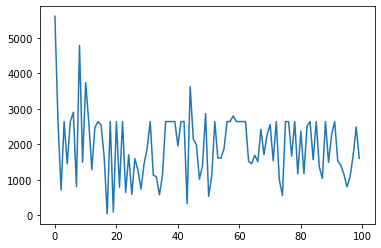

In [32]:
df_inserted = df.fillna(df['total_rooms'].mean())
df_inserted['total_rooms'][0:100].plot()

次に周りの点から線形補間する方法。

<AxesSubplot:>

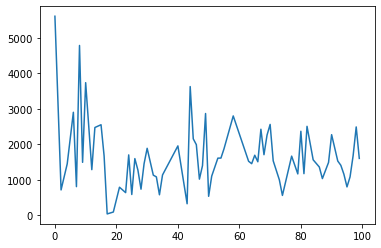

In [33]:
df_inserted = df.interpolate()
df_inserted['total_rooms'][0:100].plot()

線形補間する方法の方がより自然なプロファイルになっている。

## DataFrameの描画
### クイックルック
DataFrameに対して、クイックルック用のメソッドが用意されている。詳細は https://pandas.pydata.org/docs/user_guide/visualization.html を参照のこと。

<AxesSubplot:>

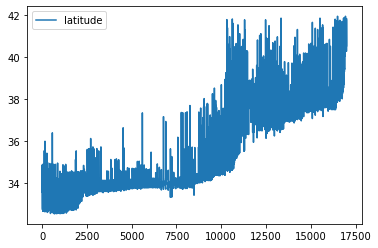

In [35]:
df[['latitude']].plot() #line plots of label 'latitude'

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'total_rooms'}>]], dtype=object)

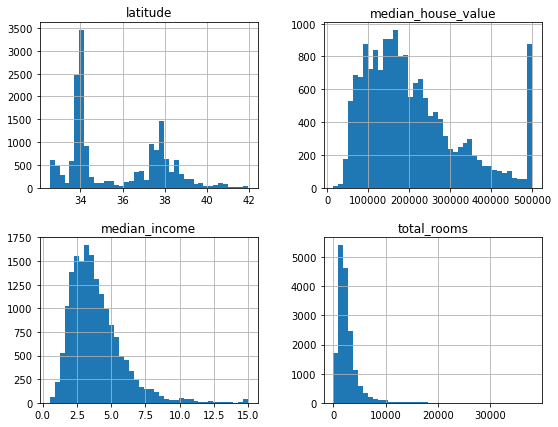

In [36]:
df[['latitude','total_rooms','median_income','median_house_value']].hist(bins=40,figsize=(9,7)) #histogram of four selected labels

### matplotlibを使った描画
DataFrameの描画メソッドの実態はmatplotlibである。従って、前回習ったmatplotlibを直接使えばより見栄えの良いプロットを作成することができる。描画する際のデータの選択は辞書と同じくキーで指定すれば良い。

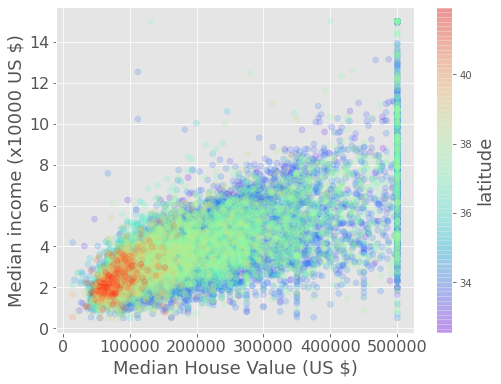

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.scatter('median_house_value','median_income',data=df,c=df['latitude'],alpha=0.2,cmap='rainbow')
plt.xlabel('Median House Value (US $)',fontsize=18)
plt.ylabel('Median income (x10000 US $)',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar().set_label('latitude',fontsize=18)
plt.show()

## 演習課題
![iris](./img/iris.png)

機械学習の分類問題でよく使われるアヤメ（iris）のデータセットを使ってその特徴を解析してみよう。本データセットは3つの種類のアヤメ（setosa、versicolor、virginica）について、萼（がく）片（sepal）と花びら（petal）のそれぞれの幅と長さの特徴（計4つの特徴量）をまとめたものである（上図、 https://www.snaplogic.com/machine-learning-showcase/iris-flower-classification より）。

以下の手順に従って、アヤメのデータを解析してみよう。できるところまでチャレンジしよう。

1. http://www.astro.phys.s.chiba-u.ac.jp/~ymatumot/lectures/GSC/3a824154b16ed7dab899bf000b80eeee/data/iris.csv をダウンロードしてColabにアップロードする。
2. pandasでデータを読み込んで、データ構造を表示して内容を確認する。
3. データ欠損があるので、欠損値を含むレコードは取り除く（`dropna()`を使う）。
4. 条件文を使って、読み込んだデータを3種類のアヤメに分ける（「条件文によるデータの抜き出し」を参考にする）。例えば、`setosa`のみを抜き出すには、

``` python
setosa = df[df['species'] == 'setosa']
```
  
5. 各特徴量それぞれがどのような頻度分布になっているか、アヤメの種類ごとに色分けして図示しよう。1つの特徴量（例えば花びらの長さ）について、3種類のアヤメの分布のグラフを重ねて1枚の図を作成する。その他の特徴量についても同様に作成する。